# Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# EDA on Dock -> Dock Data

In [14]:
df = pd.read_csv("../Xdock Data/DC800 Xdock V1.csv")

## Datetime Format

In [15]:
def convert_to_datetime_xdock(date_string):
  """
  Converts a string in format 'DD-MMM-YY hour minute second.microseconds AM/PM' to a datetime object

  Args:
      date_string: The string to be converted.

  Returns:
      A datetime object representing the date and time.
  """
  # Define the format string with corresponding codes
  am_pm = date_string[-2:]
  date_string = date_string[:-13] + " " + am_pm
  format_string = "%d-%b-%y %I.%M.%S %p"

  # Parse the string and create a datetime object
  datetime_obj = datetime.strptime(date_string, format_string)
  return datetime_obj

In [16]:
cols = ['CROSS_DOCK_CREATE_DATE', 'CROSS_DOCK_LAST_TOUCHED', 'ANCHOR_LAST_TOUCHED', 'DISPO_CREATE_DATE']
for col in cols:
    df[col] = df[col].apply(convert_to_datetime_xdock)
df

,WHSE,ILPN,LOCN_MAYBE,OLPN,CROSS_DOCK_CREATE_DATE,CROSS_DOCK_LAST_TOUCHED,ORIGINAL_LOCN,DISPO_CREATE_DATE,DISPO_USER,STAT_CODE,ANCHOR_LAST_TOUCHED,ANCHOR_LOCN,ANCHOR_USER
0,800,00000370008051001324,NaN,00000370008051001324,2024-05-15 17:32:01,2024-05-15 17:32:01,078R,2024-05-15 17:33:35,hsanchez,90,2024-05-15 17:33:35,073S,hsanchez
1,800,00000370008051001355,NaN,00000370008051001355,2024-05-15 17:48:17,2024-05-15 17:48:17,078R,2024-05-15 17:50:03,hsanchez,90,2024-05-15 17:50:02,138S,hsanchez
2,800,00000370008051001799,NaN,00000370008051001799,2024-05-15 18:16:57,2024-05-15 18:16:57,078R,2024-05-15 18:16:51,msebastiao,90,2024-05-15 18:18:02,036S,msebastiao
3,800,00000370008051001799,NaN,00000370008051001799,2024-05-15 18:16:57,2024-05-15 18:16:57,078R,2024-05-15 18:18:02,msebastiao,90,2024-05-15 18:18:02,036S,msebastiao
4,800,00000370008051001966,NaN,00000370008051001966,2024-06-01 21:07:58,2024-06-01 21:07:58,068R,2024-06-01 21:09:18,mcruz,90,2024-06-01 21:09:18,129S,mcruz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160535,800,UW14190911,NaN,UW14190911,2024-05-22 23:21:57,2024-05-22 23:21:57,126R,2024-05-22 23:22:33,jbaptista,90,2024-05-22 23:22:33,085S,jbaptista
160536,800,UW14190912,NaN,UW14190912,2024-05-22 23:20:47,2024-05-22 23:20:47,126R,2024-05-22 23:21:39,mmerengueli,90,2024-05-22 23:21:39,085S,mmerengueli
160537,800,UW14190913,NaN,UW14190913,2024-05-22 23:20:45,2024-05-22 23:20:45,126R,2024-05-22 23:21:41,mmerengueli,90,2024-05-22 23:21:41,085S,mmerengueli
160538,800,UW14190914,NaN,UW14190914,2024-05-22 23:34:32,2024-05-22 23:34:32,126R,2024-05-22 23:36:03,calvarez,90,2024-05-22 23:36:03,167S,calvarez


In [8]:
# sort by starting times
df.sort_values(by=['CROSS_DOCK_LAST_TOUCHED'], inplace=True)

## Calculate time_taken per delivery

In [9]:
# create new col to find time taken
df['time_taken'] = df['ANCHOR_LAST_TOUCHED'] - df['CROSS_DOCK_LAST_TOUCHED']
df['time_taken'] = df['time_taken'].apply(lambda x: x.total_seconds())

## Drop useless cols

In [10]:
cols = ["WHSE", "LOCN_MAYBE", "CROSS_DOCK_CREATE_DATE", "STAT_CODE", "DISPO_USER"]
for col in cols:
    try:
        df.drop(columns=[col], inplace=True)
    except:
        continue

In [11]:
df = df[df["ILPN"] == df["OLPN"]]

In [12]:
df.drop(columns=["OLPN"], inplace=True)

## Filter out bad rows

In [13]:
l = list(set(df["ANCHOR_LOCN"]))
for x in l:
    print(x)

237S
063S
079S
074S
134S
057S
207S
140S
243S
225S
209S
087S
233S
236CDY1
075S
080S
058S
082S
231S
059S
108S
066CDY1
057CDY2
146S
130S
073S
229S
162S
128S
174S
126S
067S
120S
081S
168S
069S
239S
065S
227S
085S
072S
055CDY2
156S
055CDY1
070S
106S
217S
084S
060S
122S
221S
077S
068S
223S
064CDY1
132S
055S
064S
114S
166S
116S
004S
219S
110S
086S
062S
138S
238CDY1
150S
170S
136S
083S
244CDY1
234CDY1
230CDY1
003S
071S
061S
211S
240CDY1
242CDY1
235S
241S
205S
066S
154S
112S
061CDY1
164S
213S
124S
158S
056S
088S
076S
118S
057CDY1
215S
148S
078S
152S
160S


In [7]:
# df_individual = df[df["DISPO_USER"] == "jtaveras"]
month = "5"
day = "26"
condition = f"(CROSS_DOCK_CREATE_DATE.dt.day == {day}) & (ANCHOR_LAST_TOUCHED.dt.day == {day}) & (CROSS_DOCK_CREATE_DATE.dt.month == {month}) & (ANCHOR_LAST_TOUCHED.dt.month == {month})"
df_individual = df.query(condition)
df_individual

,WHSE,ILPN,LOCN_MAYBE,OLPN,CROSS_DOCK_CREATE_DATE,CROSS_DOCK_LAST_TOUCHED,ORIGINAL_LOCN,DISPO_CREATE_DATE,DISPO_USER,STAT_CODE,ANCHOR_LAST_TOUCHED,ANCHOR_LOCN,ANCHOR_USER,time_taken
77609,800,US65173679,NaN,US65173679,2024-05-26 00:00:13,2024-05-26 00:00:13,080R,2024-05-26 00:02:17,jpena1,90,2024-05-26 00:02:17,158S,jpena1,124.0
77610,800,US65173680,NaN,US65173680,2024-05-26 00:00:15,2024-05-26 00:00:15,080R,2024-05-26 00:00:41,jpena1,90,2024-05-26 00:00:40,059S,jpena1,25.0
77611,800,US65173681,NaN,US65173681,2024-05-26 00:00:43,2024-05-26 00:00:43,080R,2024-05-26 00:01:15,vfebriel,90,2024-05-26 00:01:15,057S,vfebriel,32.0
77612,800,US65173682,NaN,US65173682,2024-05-26 00:01:27,2024-05-26 00:01:27,080R,2024-05-26 00:02:50,vfebriel,90,2024-05-26 00:02:50,053S,vfebriel,83.0
89918,800,US65189200,NaN,US65189200,2024-05-26 00:03:25,2024-05-26 00:03:25,025R,2024-05-26 00:05:10,afeliz,90,2024-05-26 00:05:10,153S,afeliz,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96513,800,US65236599,NaN,US65236599,2024-05-26 23:57:27,2024-05-26 23:57:27,068R,2024-05-26 23:58:23,eesquilin,90,2024-05-26 23:58:23,127S,eesquilin,56.0
86691,800,US65185179,NaN,US65185179,2024-05-26 23:57:43,2024-05-26 23:57:43,100R,2024-05-26 23:59:16,jpena1,90,2024-05-26 23:59:16,142S,jpena1,93.0
86690,800,US65185178,NaN,US65185178,2024-05-26 23:57:44,2024-05-26 23:57:44,100R,2024-05-26 23:58:56,jpena1,90,2024-05-26 23:58:56,142S,jpena1,72.0
86918,800,US65185402,NaN,US65185402,2024-05-26 23:58:45,2024-05-26 23:58:45,106R,2024-05-26 23:59:54,afeliz,90,2024-05-26 23:59:54,123S,afeliz,69.0


## Investigate time_taken distributions

In [72]:
# analyze distribution of time taken
df['time_taken'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.9325, 0.935, 0.9375, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995])

0.1000        22.0000
0.2000        30.0000
0.3000        37.0000
0.4000        44.0000
0.5000        53.0000
0.6000        63.0000
0.7000        78.0000
0.8000       103.0000
0.9000       166.0000
0.9100       182.0000
0.9200       208.0000
0.9300       261.0000
0.9325       288.0000
0.9350       328.0000
0.9375       416.3125
0.9400       636.3200
0.9500      1853.0000
0.9600      3001.4400
0.9700      8188.6600
0.9800     25806.2000
0.9900     75960.4900
0.9950    142171.9650
Name: time_taken, dtype: float64

In [8]:
df[df["time_taken"] < 0]

,WHSE,ILPN,LOCN_MAYBE,OLPN,CROSS_DOCK_CREATE_DATE,CROSS_DOCK_LAST_TOUCHED,ORIGINAL_LOCN,DISPO_CREATE_DATE,DISPO_USER,STAT_CODE,ANCHOR_LAST_TOUCHED,ANCHOR_LOCN,ANCHOR_USER,time_taken
155399,800,UW14184567,NaN,UW14184567,2024-05-15 17:10:24,2024-05-16 07:27:04,116R,2024-05-15 17:11:31,mmerengueli,90,2024-05-15 17:11:31,093S,mmerengueli,-51333.0
122582,800,UT13733428,NaN,UT13733428,2024-05-21 04:43:08,2024-05-21 14:04:47,068R,2024-05-21 04:43:50,rrosario,90,2024-05-21 04:43:50,077S,rrosario,-33657.0
122583,800,UT13733428,NaN,UT13733428,2024-05-21 04:43:08,2024-05-21 14:04:47,068R,2024-05-21 04:43:50,rrosario,90,2024-05-21 12:31:20,077S,scampos,-5607.0
136005,800,UW13975695,216C01,UW13975695,2024-05-28 11:44:26,2024-05-28 19:37:30,035R,2024-03-27 21:25:35,cmorel,90,2024-05-28 19:12:45,083S,lgomez,-1485.0
64799,800,UM14456379,NaN,UM14456379,2024-06-10 23:43:23,2024-06-11 03:38:01,108R,2024-06-10 23:44:14,wgomez,90,2024-06-10 23:44:14,138S,wgomez,-14027.0
64798,800,UM14456379,NaN,UF65640970,2024-06-11 03:38:01,2024-06-11 03:38:01,108R,2024-06-10 23:44:14,wgomez,90,2024-06-10 23:44:14,138S,wgomez,-14027.0
137528,800,UW13998440,NaN,UW13998440,2024-06-12 06:48:59,2024-06-12 07:22:25,128R,2024-06-12 06:49:40,jerivera,90,2024-06-12 06:49:40,154S,jerivera,-1965.0
137527,800,UW13998440,NaN,UW13998171,2024-06-12 07:22:25,2024-06-12 07:22:25,128R,2024-06-12 06:49:40,jerivera,90,2024-06-12 06:49:40,154S,jerivera,-1965.0


0.10    17.0
0.20    23.0
0.30    28.0
0.40    32.0
0.50    36.0
0.60    40.0
0.70    44.0
0.80    48.0
0.90    53.0
0.95    56.0
0.99    58.0
Name: time_taken, dtype: float64


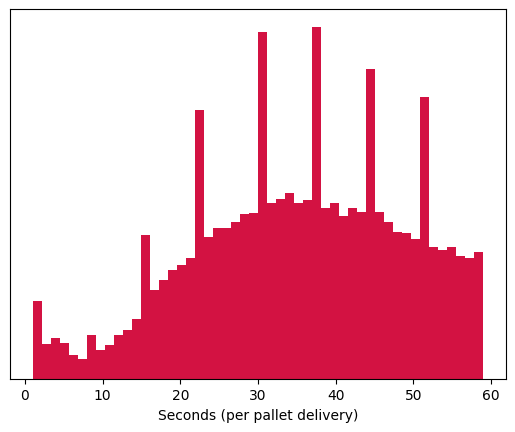

In [107]:
# Grab bottom 93 percentile to remove outliers
# Remove negative values
# Graph distribution

percentile = 0.93
df = df.sort_values(by='time_taken')
threshold_index = int(len(df) * percentile)
df = df.iloc[:threshold_index]
print(df['time_taken'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))
df = df[df['time_taken'] > 0]
plt.hist(df['time_taken'], bins=50, color='#D31242')
ax = plt.gca()
plt.xlabel('Seconds (per pallet delivery)')
ax.get_yaxis().set_visible(False)
plt.show()

## Investigate rare situations

In [98]:
df_user_not_same = df[df['DISPO_USER'] != df["ANCHOR_USER"]]
df_user_not_same

,WHSE,ILPN,LOCN_MAYBE,OLPN,CROSS_DOCK_CREATE_DATE,CROSS_DOCK_LAST_TOUCHED,ORIGINAL_LOCN,DISPO_CREATE_DATE,DISPO_USER,STAT_CODE,ANCHOR_LAST_TOUCHED,ANCHOR_LOCN,ANCHOR_USER,time_taken
109030,800,US65388087,OSS013,US65388087,2024-06-03 19:42:41,2024-06-03 23:34:47,068R,2024-03-04 01:56:05,afeliz,90,2024-06-03 23:34:48,127S,bwakim1,1.0
46466,800,UH14256009,202C25,UH14256009,2024-06-10 19:42:29,2024-06-11 02:15:34,108R,2024-05-30 17:41:49,ygomez,90,2024-06-11 02:15:35,058S,acolon,1.0
46467,800,UH14256011,202C25,UH14256011,2024-06-10 19:42:29,2024-06-11 02:20:53,108R,2024-05-30 18:22:17,calvarez,90,2024-06-11 02:20:54,144S,acolon,1.0
114548,800,UT13655950,NaN,UT13655950,2024-05-28 21:13:59,2024-05-28 21:13:59,106R,2024-05-28 20:16:49,nmoscoso,90,2024-05-28 21:14:00,018S,iperez,1.0
68362,800,UM14462080,R262C05,UM14462080,2024-06-10 19:42:29,2024-06-11 00:45:09,126R,2024-06-04 04:35:47,wrivera,90,2024-06-11 00:45:10,129S,acolon,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141449,800,UW14008558,NaN,UW14008558,2024-05-29 17:48:13,2024-05-29 17:48:13,116R,2024-05-29 17:48:35,msebastiao,90,2024-05-29 17:52:28,144S,rgarcia,255.0
71710,800,UM14508895,NaN,UM14508895,2024-05-14 01:53:37,2024-05-14 01:53:37,102R,2024-05-14 01:54:37,llopez,90,2024-05-14 01:57:52,113S,fmendoza,255.0
95739,800,US65235637,210C18,US65235637,2024-06-07 04:29:15,2024-06-08 05:01:11,114R,2024-05-25 13:53:40,jcalzado,90,2024-06-08 05:05:28,055S,jreyes01,257.0
49889,800,UH14261557,NaN,UH14261557,2024-05-17 19:08:22,2024-05-17 19:08:22,023R,2024-05-17 17:03:42,svasquez,90,2024-05-17 19:12:39,105S,jamunoz,257.0


In [32]:
df = df[df['time_taken'] <= 3600] 

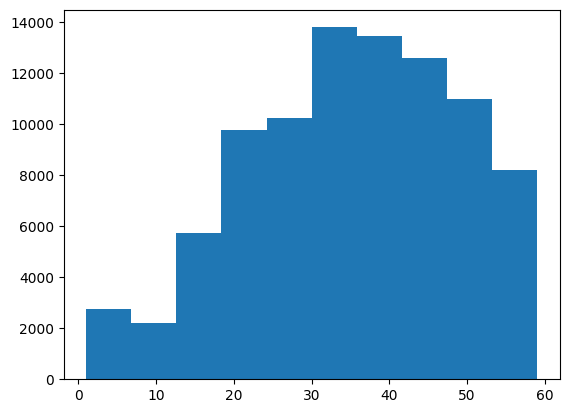

In [110]:
plt.hist(df['time_taken'], bins=10)
plt.show()

## Testing standardization of location values

In [116]:
import data_load
from data_load import load_aggregate_data, get_user_tasks
import pandas as pd
from datetime import datetime
import json

In [126]:
df = load_aggregate_data(
    "Xdock Data/DC800 Xdock V1.csv",
    "PTC to Shipping/DC800 PTC Out.csv",
    date=datetime(2024, 5, 26),
)
df_user = get_user_tasks(df, "atoribio")

Cleaned out 11.574062538931107 % of entries
Cleaned out 1.0025097797282707 % of entries


In [127]:
def remove_last_R(locn):
        """Removes 'R' from the last character if it exists."""
        return locn[:-1] if locn.endswith("R") else locn
def remove_leading_zeros(text):
    """Removes leading zeros from a string."""
    return text.lstrip("0")
df_user["from_locn"] = df_user["from_locn"].apply(remove_last_R)
df_user["to_locn"] = df_user["to_locn"].apply(lambda x: x[:-1])
df_user["from_locn"] = df_user["from_locn"].apply(remove_leading_zeros)
df_user["to_locn"] = df_user["to_locn"].apply(remove_leading_zeros)
df_user.sort_values(by=["from_time"], inplace=True)
df_user.head()

C:\Users\ctang\AppData\Local\Temp\1\ipykernel_9616\2088757173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user["from_locn"] = df_user["from_locn"].apply(remove_last_R)
C:\Users\ctang\AppData\Local\Temp\1\ipykernel_9616\2088757173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user["to_locn"] = df_user["to_locn"].apply(lambda x: x[:-1])
C:\Users\ctang\AppData\Local\Temp\1\ipykernel_9616\2088757173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,id,from_time,from_locn,to_time,to_locn,user,time_taken
3492,UW14080765,2024-05-26 05:53:57,682,2024-05-26 05:54:04,141,atoribio,7.0


In [128]:
print(list(set(df_user["from_locn"])))

['682']


## Simulation draft for single user with list of tasks

In [129]:
def load_distance_map(filename):
    distance_map = {}
    with open(filename, "r", encoding="utf-8") as infile:
        distance_map = json.load(infile)
    new_dist_map = {}
    for x in distance_map:
        values = x[1:-1].split(",")
        new_tuple = (values[0].strip()[1:-1], values[1].strip()[1:-1])
        new_dist_map[new_tuple] = distance_map[x]
    return new_dist_map


In [130]:
dist_map = load_distance_map("DC800_Distances.json")

In [123]:
list(set(df["user"]))

['cvalle',
 'fmendoza',
 'llopez',
 'drosario',
 'etejada',
 'mdubon',
 'ztirado',
 'rfernandez',
 'jtaveras',
 'afeliz',
 'bwakim1',
 'csantiago',
 'atoribio',
 'wmarte',
 'agonzalez2',
 'jpena1',
 'jjumonville',
 'adiaz',
 'Ebello',
 'mpilling',
 'rrodriguez01',
 'scardoso',
 'wguerrero',
 'dvargas',
 'mortiz',
 'bguerrero',
 'amuriel',
 'skane',
 'yherrera',
 'jfantasia',
 'acole',
 'acoronado',
 'eesquilin',
 'jortiz',
 'mvialet',
 'tmorales',
 'avasquez',
 'bcruz',
 'dcharette',
 'treich',
 'jtavares',
 'ysantos',
 'vfebriel']

In [131]:
prev_time = df_user.iloc[0]["to_time"]
counter = 0
for index, row in df_user.iterrows():
    new_time = row["from_time"]
    if (prev_time > new_time):
        counter += 1
        print(row)
    prev_time = new_time
print(counter)

id                     UW14080765
from_time     2024-05-26 05:53:57
from_locn                     682
to_time       2024-05-26 05:54:04
to_locn                       141
user                     atoribio
time_taken                    7.0
Name: 3492, dtype: object
1


In [132]:
total_distance = 0
time_without_pallet = 0
time_with_pallet = 0
total_pallets = df_user.shape[0]
curr_locn = df_user.iloc[0]["from_locn"]
i = 0
# ASSUME THIS IS ONE USER
# loop through user's tasks
while (i < df_user.shape[0]):
    # task data
    row = df_user.iloc[i]
    curr_time = row["from_time"]
    new_locn = row["from_locn"]
    to_locn = row["to_locn"]
    to_time = row["to_time"]

    # add total time to time with pallet
    time_with_pallet += (to_time - curr_time).total_seconds()

    # truncate symbol for S,R,A,B for dock door
    if curr_locn[-1] in ["S", "R", "A", "B"]:
        curr_locn = curr_locn[:-1]
    if to_locn[-1] in ["S", "R", "A", "B"]:
        to_locn = to_locn[:-1]
    
    # add distance traveled from prev locn to new curr locn
    if curr_locn != row["from_locn"]:
        total_distance += dist_map[(curr_locn, row["from_locn"])]
        curr_locn  = row["from_locn"]
        # calculate time unefficient w/o pallet
        if i >= 1:
            time_to_next_pallet = (curr_time - df_user.iloc[i-1]["to_time"]).total_seconds()
            # prevent outliers (>= 15min w/o pallet)
            if time_to_next_pallet < 900 and time_to_next_pallet > 0:
                time_without_pallet += time_to_next_pallet
    
    # check if next task start time is before curr task end time
    if i < df_user.shape[0] - 1 and df_user.iloc[i+1]["from_time"] <= to_time:
        # pickup next pallet first before deliver them
        next_pallet = df_user.iloc[i+1]
        # add distance from curr locn to next pallet
        if curr_locn != next_pallet["from_locn"]:
            total_distance += dist_map[(curr_locn, next_pallet["from_locn"])]
        # add distance from next pallet to destination
        total_distance += dist_map[(next_pallet["from_locn"], next_pallet["to_locn"])]
        # add distance from next pallet to final destinatoin
        if next_pallet["to_locn"] != to_locn:
            total_distance += dist_map[(next_pallet["to_locn"], to_locn)]
        # reset curr locn
        curr_locn = to_locn
        # update index
        i += 2
    else:
        # go straight to destination
        total_distance += dist_map[(curr_locn, to_locn)]
        curr_locn = to_locn
        # update index
        i += 1

print(f"Average distance per pallet: {total_distance * 6.67 / df_user.shape[0]} ft ")
print(f"Total time without pallet: {time_without_pallet} seconds")
print(f"Total time with pallet: {time_with_pallet} seconds")
print(f"Total number of pallets Xdocked: {total_pallets}")

Average distance per pallet: 500.25 ft 
Total time without pallet: 0 seconds
Total time with pallet: 7.0 seconds
Total number of pallets Xdocked: 1
